<h1> TASk:</h1>
Bank notes classification - Identifying forged bank notes and genuine bank notes

 <h1> About the dataset</h1>
<h3>Source:</h3>

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
Date received: August, 2012


<h3>Data Set Information:</h3>

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


<h3>Attribute Information:</h3>

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

The dataset for this project was download from https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt . The dataset has 5 columns and 1371 rows. the first four columns represent the input features while the last column represent the target variable called the class. There are two classes in the target variable which are the forged banknotes denoted with 1 and the genuine banknotes denoted with 0. The genuine banknotes belonging to the negative class has 44% instances. While the forged banknotes belonging to positive class has 56% instances. The data is seems to be mild balance. 

<h1> Aim of the project</h1>
<p> The project aimed at identifying genuine and forged banknotes and classifying them according to their class. These measures will help reduce bank fraud via forged bank notes. <br>

<h1> Techniques</h1>

The data has two classes so it is a binary case. We used two classifiers for this project, namely logistic regression and support vector machine which are good binary classifiers.

<h1> Import the Libraries</h1>

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm 
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve,auc, roc_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import sys
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import  StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV


# Load the data

In [190]:
# read file as csv
data = pd.read_csv(r'C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project\machine\data_banknote_authentication.txt',sep=',')
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


<h1> Feature Engineering</h1>

In [191]:
# Label columns to understand the data
data.columns = 'waveletVar','WaveletSkew','WaveletCurt','Entropy','class'
data

,waveletVar,WaveletSkew,WaveletCurt,Entropy,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


<h1> Descriptive Statistics</h1>

In [192]:
# describe the data
data.describe()

,waveletVar,WaveletSkew,WaveletCurt,Entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


There seems to be an extreme maximum value for the wavelet kurtosis column which may consider as an outlier

<h1> Check for missing value</h1>

In [193]:
# check for missing value
data.isna().sum()

waveletVar     0
WaveletSkew    0
WaveletCurt    0
Entropy        0
class          0
dtype: int64

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   waveletVar   1371 non-null   float64
 1   WaveletSkew  1371 non-null   float64
 2   WaveletCurt  1371 non-null   float64
 3   Entropy      1371 non-null   float64
 4   class        1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<h1> Visualize data distribution</h>

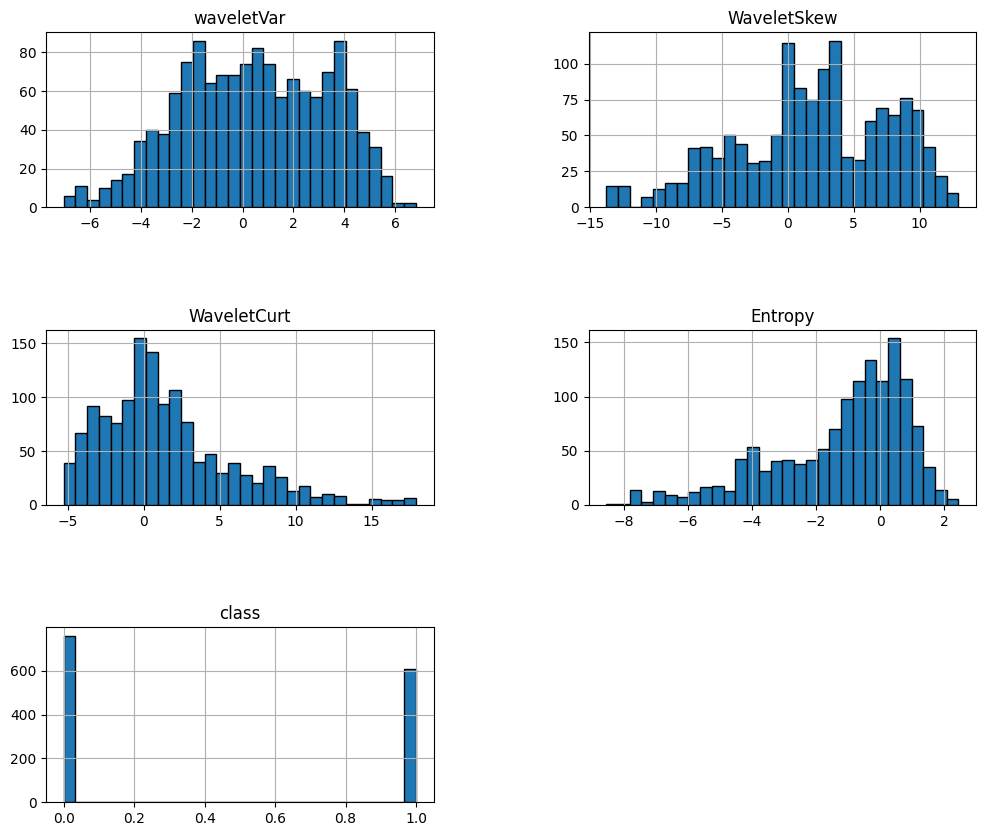

In [195]:
data.hist(figsize=(12,10),bins=30,edgecolor = 'black')
plt.subplots_adjust(hspace=0.7,wspace=0.4)

The waveletVar and waveletskew seems to be a normally(Gaussian) distributed data. While the waveletcurt is right skewed and entropy is left skewed

<h1> Visualize Outliers</h1>

In [196]:
fig = px.box(data)
fig.show()

There seems  to  be an waveletCurt and entropy outliers.</p>

The two choices for the histplot and plotly express were used for visualizing the outliers and distribution

<h1> Detect Outliers</h1>

In [197]:
# Describing IQR to detect outlier position~ alternative to box plot

# Create a function to return index of outliers
def indicies_of_outliers(data):
    q1, q3 = np.percentile(data.iloc[::,0:4][-1:], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)    #getting more bigger interval
    return np.where((data.iloc[::,0:4] > upper_bound) | (data.iloc[::,0:4] < lower_bound))
# Run function
print('outlier indexies',indicies_of_outliers(data))

outlier indexies (array([   0,    2,    4,    6,    6,    7,    8,    9,   11,   12,   13,
         17,   18,   19,   19,   21,   22,   23,   24,   24,   26,   27,
         27,   31,   32,   33,   34,   35,   38,   39,   40,   40,   41,
         42,   43,   44,   44,   45,   46,   46,   47,   51,   52,   55,
         56,   58,   58,   61,   66,   67,   68,   71,   73,   75,   76,
         77,   79,   81,   82,   83,   85,   86,   89,   91,   92,   92,
         94,   96,   96,   97,   98,   98,   99,  105,  106,  107,  108,
        110,  111,  112,  113,  115,  116,  119,  120,  121,  122,  123,
        123,  124,  125,  125,  130,  131,  133,  133,  134,  135,  136,
        137,  138,  138,  143,  148,  149,  150,  152,  153,  155,  160,
        161,  162,  165,  166,  167,  167,  168,  171,  172,  172,  175,
        175,  176,  177,  178,  180,  181,  182,  183,  184,  186,  188,
        190,  193,  193,  194,  195,  196,  198,  198,  199,  201,  201,
        202,  203,  206,  207,  2

<h1> Compute the 10th and 9th percentiles and replace the outliers</h1>

In [198]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data.iloc[::,0:4], 10)
ninetieth_percentile = np.percentile(data.iloc[::,0:4], 90)
print("Tenth Percentile:",tenth_percentile,"and Ninetieth percentile:", ninetieth_percentile)
X = np.where(data.iloc[::,0:4]<tenth_percentile, tenth_percentile, data.iloc[::,0:4])
X = np.where(data.iloc[::,0:4] > ninetieth_percentile, ninetieth_percentile,data.iloc[::,0:4])
# print("Sample:", sample)

Tenth Percentile: -4.08097 and Ninetieth percentile: 6.474129999999998


<h1> Check if data is balance</h1>

Text(0.5, 0, 'class')

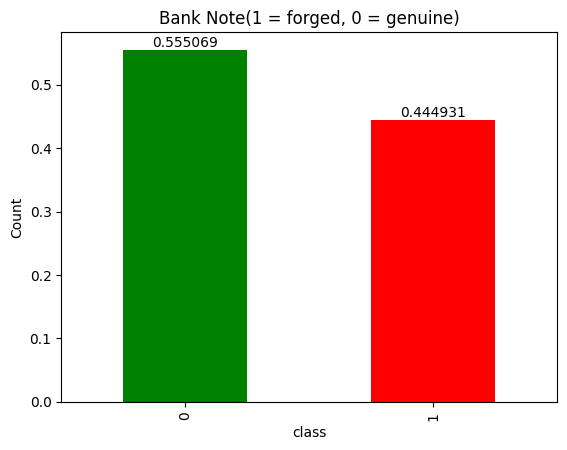

In [199]:
frequency = pd.Series(data['class'].value_counts(normalize=True).sort_index())
fig = frequency.plot.bar()
fig = frequency.plot(kind ='bar',color=['green','red'])
fig.bar_label(fig.containers[0])
plt.title('Bank Note(1 = forged, 0 = genuine)')
plt.ylabel('Count')
plt.xlabel('class')

The data is mild inbalance, since the percentage difference from the minority class is not much, we can consider it four our machine learning problem. </p>

The green bar on the left represent genuine note and it constitute 56% of the entire note received. While the red bar on the right represent forged bank notes and it constitute 44% percent of the entire bank notes.

<h1> Visualize class characteristics with features</h1>

[Text(0, 0, 'waveletVar'),
 Text(1, 0, 'WaveletSkew'),
 Text(2, 0, 'WaveletCurt'),
 Text(3, 0, 'Entropy')]

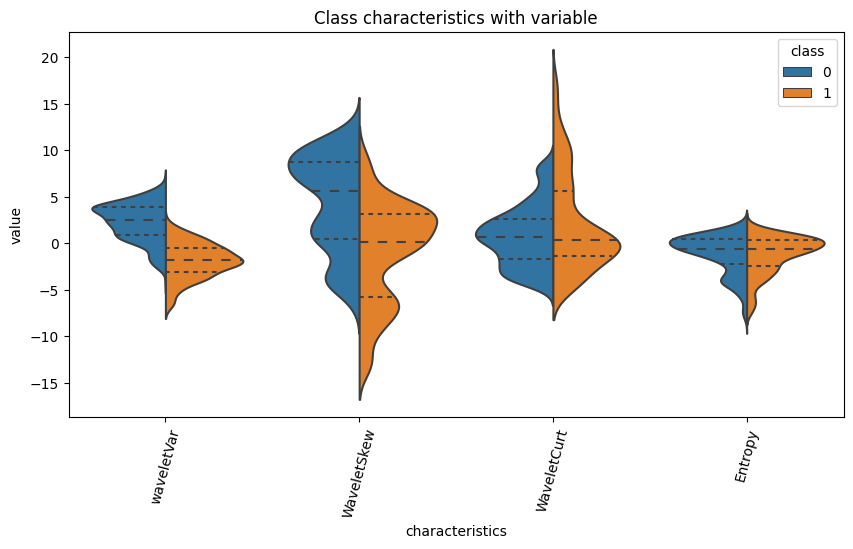

In [200]:
# stack class data 
data_div = pd.melt(data,'class',var_name='characteristics')
#print(data_div.to_string())
fig, ax = plt.subplots(figsize = (10,5))
plot = sns.violinplot(ax=ax,data=data_div,x='characteristics', y='value',hue='class',split=True, inner='quartile')
data_without_class = data.drop(['class'],axis=1)
plt.title("Class characteristics with variable")
plot.set_xticklabels(labels=data_without_class.columns,rotation=75)

<h1> Visualize data relationship with seaborn</h1>

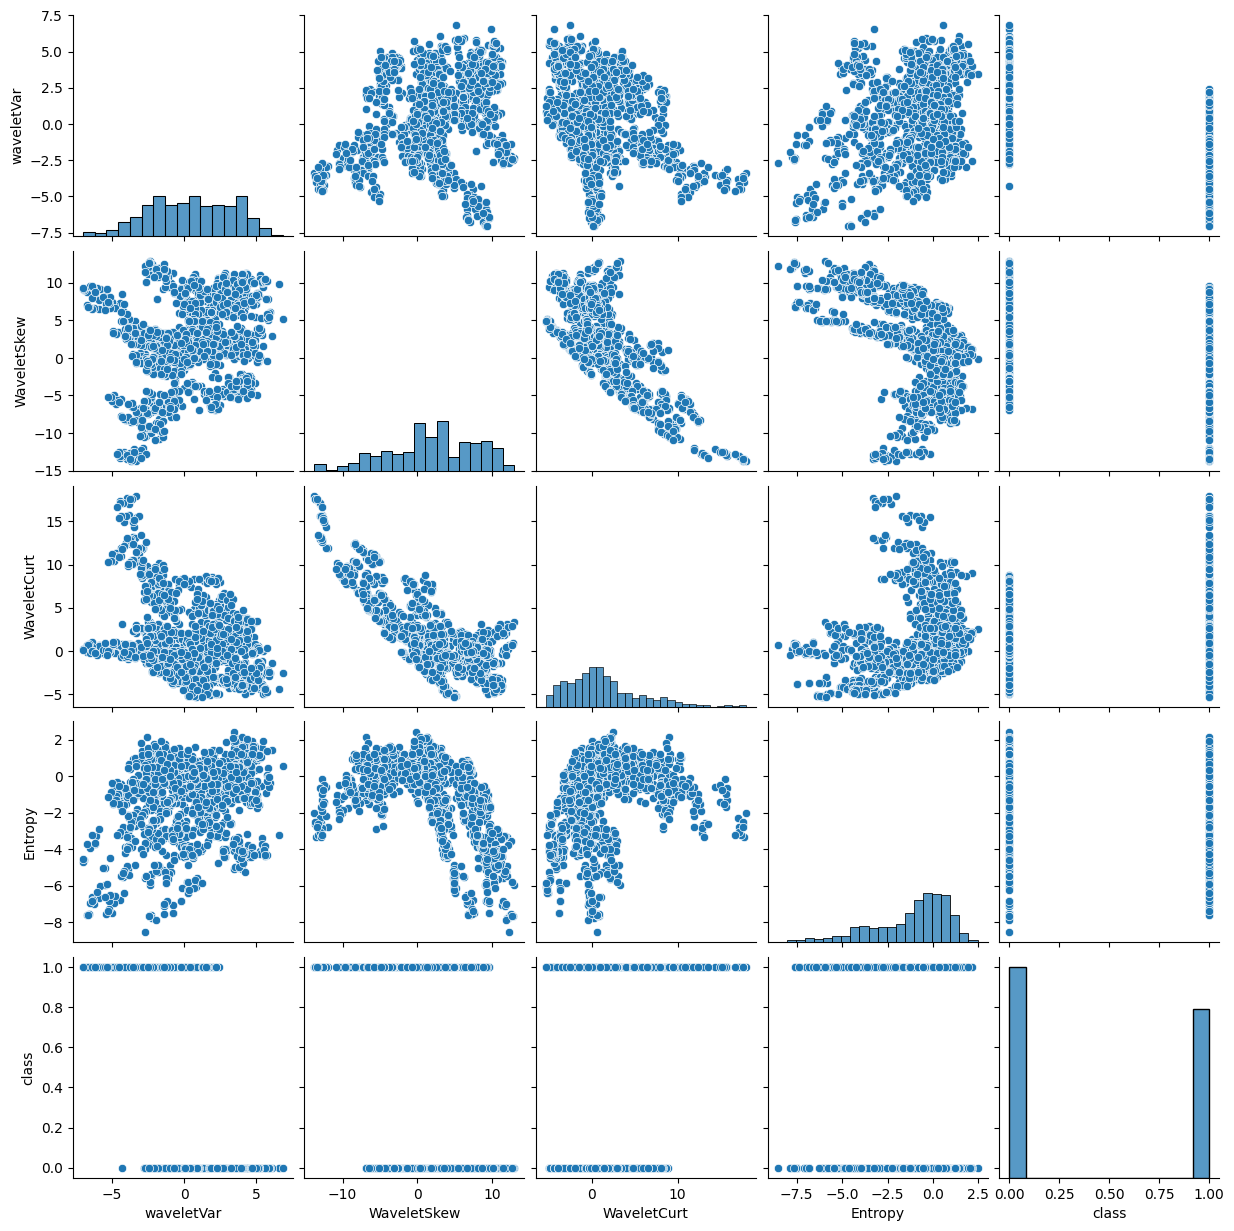

In [201]:
sns.pairplot(data)

Here, we used the seaborn pair plot to visualize the relationship among variables

<h1> Visualize data correlation with heatmap and confusion matrix</h1>

<Axes: >

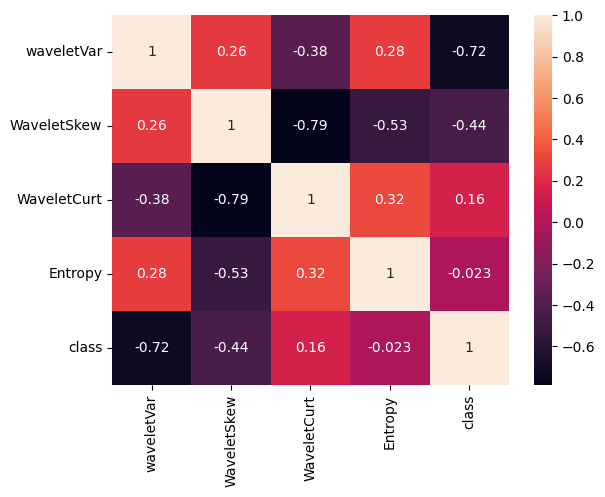

In [202]:
sns.heatmap(data.corr(),annot=True) # display matrix

The correlation existing in the in the heatmap is associated with the wavelet variance feature having a correlation point of -0.72 (negative correlation) correlation with the class variable. Hence we are considering all the feature, we will go ahead and use them.

<h1> Split data into training and testing set</h1>

In [203]:
X = data.drop('class', axis=1) # assign input features to x and drop the y class

y = data['class'].values # assign the class variable to y and convert it to a numpy array

print('Input data shape size',X.shape)
print('class shape size',y.shape)

Input data shape size (1371, 4)
class shape size (1371,)


<h1> Split data into training and testing set</h1>

In [204]:
# Data split into x_train ,X_test and y_train, y_test respectively
X_train,X_test, y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=123)

We split the data into training and testing set. 20% of the data will be used for testing our model performance. A random state of 123 was chosen to replicate the sequence since we are going to be comparing our model performance with another model later on

<h1> Normalize data</h2>

In [205]:
scaler = StandardScaler() # standard scaler
X_train = scaler.fit_transform(X_train) # transform training set into 0 and 1
X_test = scaler.transform(X_test)  # normalize the test set

Standardization and normalization helps us to scale our data to assume a univariate values of zero and one's. It is a good practice to always scale our data before training because machine learning algorithm are more efficient and perform better on a scaled data

<h1> Model Selection</h1>

In [206]:
model = LogisticRegression(solver='lbfgs',random_state=123) # select the logistic model
model

LogisticRegression(random_state=123)

<h4><u><b> Choice for Logistic Regression:</u></h4>
Logistic regression is well suited for binary classification task since it uses the sigmoid function to return the probability of an outcome between 0 and 1. The random state was set to 123 as we will like to replicate the sequence later and compare our model with another. The  'lbfgs' which refer to Broyden-Fletcher-Goldfarb-Shanno algorithm is an optimization algorithm that uses a limited amount of computer memory for data processing. It help to eliminate hassles associated with runtime especially when we are dealing with large dataset

<h1> Training the model</h1>

In [207]:
y_train = (y_train == 1) # assign a positive sentiment to the training class
y_test = (y_test == 1)   # assign a positive sentiment to the testing class

In [208]:
model.fit(X_train,y_train) # Train the model

LogisticRegression(random_state=123)

<h1> Evaluate Model Performance</h1>

In [209]:
print("Train score",model.score(X_train,y_train)) # display training score
print("Test score",model.score(X_test,y_test))    # display testing score

Train score 0.9835766423357665
Test score 0.9745454545454545


Accuracy is the Number of correct predictions divided by the total number of predictions. For our binary classification, accuracy is calculated as; Accuracy = TP + TN/ TP + TN + FP + FN. Where TP is called True positive, TN is True Negative, FP is False Positive and FN is False Negative

Wow! 98% accuracy on the training data and 97% on the testing data. This shows a good performance but accuracy is not the best measure for performance we need to consider other metrics and justify our claim, because even a dummy classifier that goes for the majority class can give a reasonable accuracy sometimes. Let us see the dummy classifier performance and compare it with the logistic classifier.

<h1> Dummy Classifier</h1>

In [210]:
dummy_cls = DummyClassifier() # called the classifier constructor and assign it to the variable name dummy_cls
dummy_cls.fit(X_train,y_train) # train the model
dummy = dummy_cls.score(X_train,y_train) # evaluate the model performance
print("Dummy accuracy",dummy)   # Display the result

Dummy accuracy 0.5602189781021898


The classify gave 56% percent accuracy, this is due to the fact that our data is mild imbalance, if you could remember the majority class was 56%. Now let us evaluate our model performance with the confusion matrix. This allow us to understand how the model made it predictions 

<h1> Make Prediction from the Test Set</h1>

In [211]:
y_predict_bank_notes = model.predict(X_test) # predict from the testing set
y_predict_bank_notes

array([False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False,

<h1> Model Parameters</h1>

In [212]:
print("Maximum Prediction is",y_predict_bank_notes.argmax()) # highest predictions
print("classes involved are",model.classes_) # classes

Maximum Prediction is 4
classes involved are [False  True]


<h1> Error Analysis </h1>

In [213]:
cfm = confusion_matrix(y_test,y_predict_bank_notes) # confusion matrix
print(cfm)

[[141   6]
 [  1 127]]


Text(0.5, 1.0, 'Confusion matrix normalize')

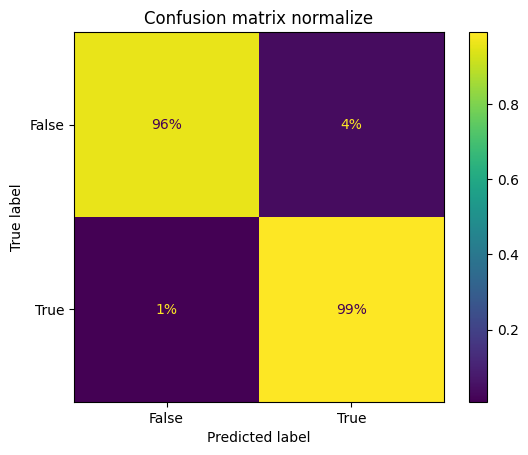

In [214]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_bank_notes,normalize='true',values_format='.0%') # Display confusion matrix
plt.title("Confusion matrix normalize")

<h4><u> Analysis</u></h4><p>
<o><li>On the first yellow bar on the top left shows that 96% of our data or instances were truly classified as negative. This is known as True Negative.
<li> The violet color at the top right shows 4% instances that were negative was misclassified as positive. This is known as False Positive</li>
<li> On the violet color bar on the bottom left shows 1% of instance misclassified as negative was actually positive. This is known as False Nagtive(recall)
<li> Lastly, The yellow bar on the bottom right shows 99% of instances classified as positive were positive. This is called True Positive(precision).<br>

 <p>    This model seems to be a good predictor, but let us not conclude yet. Let find out how well our classifier made this predictions by considering other metrix like precision, recall, f1-score, recall_precision_curve, ROC curve etc., to justify the classifier claim.
</p></li>

</li></o>

In [215]:
score=classification_report(y_test,y_predict_bank_notes) # assign classification report to the score variable

print("Test Results:\n",score,"\n") # display result

Test Results:
               precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.95      0.99      0.97       128

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275
 



<justify>Before taking a deep dive into the above report let us try to define some key terms.<br>
<p><b><u> Precision(also called positive predictive value):</u> This is the fraction of relevant instances among the retrieve instances while <br>
<b><u> Recall(also known as sensitivity):</u> is the fraction of relevant instances that were retrieved. Both precision and recall are based on relevance(positive.)<br>
<u><b> F1-score:</u> This is the harmonic mean of precision and recall. i.e it combines the precision and recall score of the model. It is actually a trade-off between precision and recall.<br>

Now we have understood this concept, let us now try to analyze our result<br>
The precision score for the positive (forged bank notes) class is 95% while 99% for the recall positive class. This means that  95% instances were predicted to be true but 99% were actually positive (real truth). 97% harmonic mean was achieved (f1-score) on 128 instances.<br>

<p> For the negative class (genuine bank notes),the precision score was 99% while the recall is 96%. This means that 99% of the bank notes that was predicted to be genuine, 96% were actually genuine. A harmonic sore of 98% was achieved on 147 instances. Accuracy of 97% on total number of 275 instances for our test set was achieved.<br>
<p> Amazing !, This is indeed a good predictor. We have finally justified our claim </justify>

Text(0.5, 1.0, 'Misclassified sample weight')

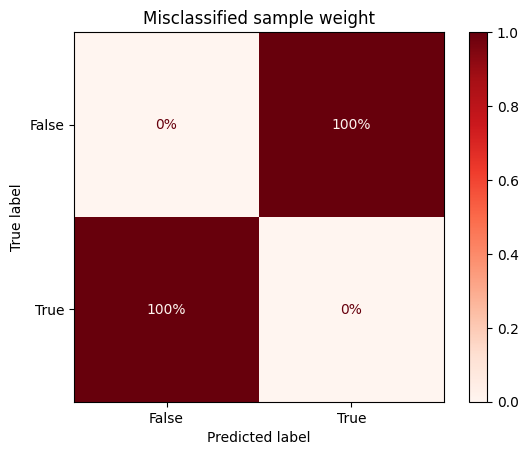

In [216]:
sample_weight = (y_predict_bank_notes != y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_bank_notes ,cmap="Reds",sample_weight=sample_weight,normalize='true',values_format='.0%')
plt.title("Misclassified sample weight")

<h1> Precision and Recall Curve</h1>

Logistic: f1=0.973 auc=1.000


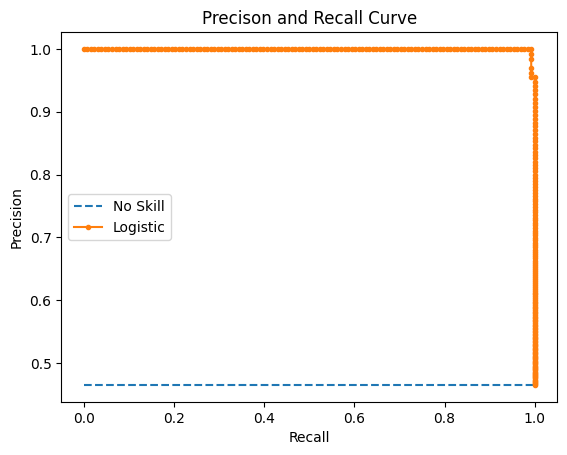

In [217]:
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
#title
plt.title("Precison and Recall Curve")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

We  Achieved  98% for the f1-score and 100 percent for the auc

<h1> ROC and AUC curve</h1>

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


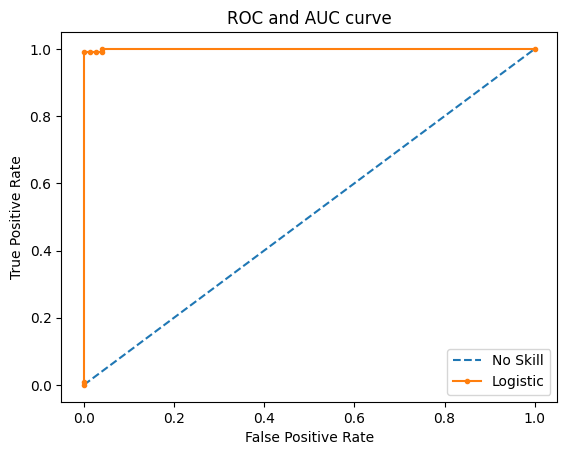

In [218]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title( 'ROC and AUC curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We have  plotted the No skill classifier (dummy) that only predict 0 for all example and we are able to achieve 100% accuracy while the dummy classify recorded 56% for all examples. This is a solid indication that our model has a skill

# Cross Evaluation for the Training Set

In [219]:
 scores = cross_val_score(model,X_train,y_train, scoring = 'accuracy',cv=3, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.00


Cross evaluation score gave us a 98% accuracy with a standard deviation of 0.00. Wow!, good predictor.

In [220]:
y_predict = cross_val_predict(model,X_train, y_train,cv=3)

Text(0.5, 1.0, 'Confusion matrix for Training set')

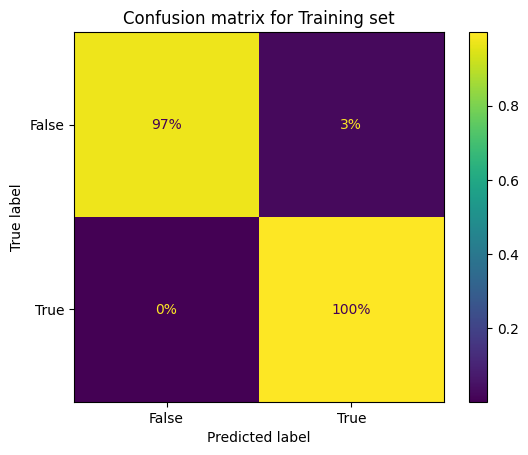

In [221]:
ConfusionMatrixDisplay.from_predictions(y_train,y_predict,normalize='true',values_format='.0%')
plt.title("Confusion matrix for Training set")

<h4><u> Analysis</u></h4><p>
<o><li>On the first yellow bar on the top left shows that 97% of our data or instances were truly classified as negative. This is known as True Negative.
<li> The violet color at the top right diagonal shows 3% instances that were negative was misclassified as positive. This is known as False Positive</li>
<li> On the violet color bar on the bottom left shows 0% of instance misclassified as negative was actually positive. This is known as False Nagtive(recall)
<li> Lastly, The yellow bar on the bottom right shows 100% of instances classified as positive were positive. This is called True Positive(precision).<br>

 <p>    This model seems to be a good predictor, but let us not conclude yet. Let find out how well our classifier made this predictions by considering other metrix like precision, recall, f1-score, recall_precision_curve, ROC curve etc., to justify the classifier claim.
</p></li>

</li></o>

<h1> Precision and Recall</h1>

In [222]:
# Display result
print("Precision Score",precision_score(y_train,y_predict)) 
print("Recall Score",recall_score(y_train,y_predict))
print("F1-Score",f1_score(y_train,y_predict))

Precision Score 0.9658634538152611
Recall Score 0.9979253112033195
F1-Score 0.9816326530612245


<h1> Classification Report for the Training Set</h1>

In [223]:
scores=classification_report(y_train,y_predict) # assign classification report to the score variable

print("Test Results:\n",scores,"\n") # display result

Test Results:
               precision    recall  f1-score   support

       False       1.00      0.97      0.99       614
        True       0.97      1.00      0.98       482

    accuracy                           0.98      1096
   macro avg       0.98      0.99      0.98      1096
weighted avg       0.98      0.98      0.98      1096
 



The precision score for the positive (forged bank notes) class is 97% while 100% for the recall positive class. This means that  97% instances were predicted to be true but 100% were actually positive (real truth). 98% harmonic mean was achieved (f1-score) on 482 instances.<br>

<p> For the negative class (genuine bank notes),the precision score was 100% while the recall is 97%. This means that 100% of the bank notes that was predicted to be genuine, 97% were actually genuine. A harmonic sore of 98% was achieved on 147 instances. Accuracy of 99% on total number of 614 instances for our test set was achieved.<br>
<p> Amazing !, This is indeed a good predictor

# Prediction decision for each class

In [224]:
y_scores = cross_val_predict(model,X_train,y_train, method = 'decision_function') # decision function for each class
print(y_scores) # display the result

[ -5.25805825  -9.54141626   3.07352259  -6.38752777  -9.84612856
   6.60842458  -9.31291208  -6.3302833    4.82550321   6.97375314
   4.75421049  -5.19908123  -6.76510492  -6.18874174  -3.70728692
  -5.07746053  -9.55275441  -8.58757487   2.805071    -6.11227306
   1.48176688  -6.32676657  -3.25608702   4.8257606   -4.25106579
  -5.43618744   1.28442231  -5.21759623   6.56231863  -8.27692617
   5.33257993  -6.98754304  -5.60242712   5.23048667   3.30748781
   4.38265069   5.03069583   0.75920708  -3.33266395  -5.31690385
  -3.89789209   1.37618516   4.47880561  -6.88720861  -4.29386055
   3.49973645   5.78936912  -5.00354344  -3.7424588   -2.33889797
  -5.03008461  -5.15049145   5.33031301  -0.53675627  -5.00889505
  -5.43597713  -7.2301001   -5.28749474  -5.69429189   1.51220344
   4.46690916   2.87439308  -5.64259534  -3.07237687  -6.6210389
   4.58214852 -10.4464847   -6.81135573  -4.13163399  -7.60475239
   3.34937814   3.70118501   0.84045342  -1.57137065   3.12147388
  -4.832405

<h1> Hyper tuning the Logistic Regression Model</h1>

In [225]:
# Define model and parameters
solvers = ['newton-cg','lbfgs','liblinear'] # kernels selection
penalty = ['l2'] # shrinking less contributive variable towards zero
c_values = [100,10,1.0,0.1,0.01,0.001,0.0001] # choosing hyperameters

grid = dict(solver=solvers,penalty=penalty,C=c_values) # create a grid dictionary
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=123) # run 10 Split folds 

# Define grid search 
grid_search = GridSearchCV(estimator=model,param_grid=grid,cv=cv, n_jobs=-1, scoring='accuracy') # return grid accuracy
grid_result = grid_search.fit(X_train,y_train) #train grid with examples


print("Best: %f using %s" % (grid_search.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']      # mean score
stds = grid_result.cv_results_['std_test_score']    # get the standard deviation
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f(%f) with: %r" % (mean , stdev, param)) # display parameter , mean and standard deviation

Best: 0.992080 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990865(0.006685) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990865(0.006685) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.991168(0.006883) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992080(0.006981) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992080(0.006981) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.991774(0.007604) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983559(0.008014) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983559(0.008014) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983559(0.008014) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.975335(0.013012) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.975335(0.013012) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.976555(0.012009) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.938246(0.021324) with: {'C': 0.01,

After configuring our grid, we were able to achieve 99% accuracy for the logistic regression classifier, which is our best score with a c value of 10, penalty set to l2 using the newton-cg kernel as compared to the initial result of 97% before hyper tuning.

<h1> Binary Classification with support vector machine</h1>

<h1> Selecting the model</h1>

In [226]:
svm_classifier = svm.SVC(kernel='rbf',random_state=123) # call the losgistic constructor and pass it to variable svc_classifier

<h1> Train the model</h1>

In [227]:
svm_classifier.fit(X_train,y_train) # train the model

SVC(random_state=123)

<h1> Evaluate Performance </h1>

In [228]:
# display model score
print("Model accuracy",svm_classifier.score(X_train,y_train))

Model accuracy 1.0


<h1> Predict Bank Notes</h1>

In [229]:
y_predict_notes = svm_classifier.predict(X_test) # predict note

In [230]:
y_pre_note = np.argmax(y_predict_notes) # return the maximam prediction
y_pre_note

4

<h1> Error Analysis for support vector machine</h1>

In [231]:
confusion_matrix(y_predict_notes,y_test) # view the matrix

array([[147,   0],
       [  0, 128]], dtype=int64)

Confusion Matrix Output:
 [[147   0]
 [  0 128]] 
-----------------------------------------------------------


Text(0.5, 1.0, 'Error Normalized --> Figure 1.2')

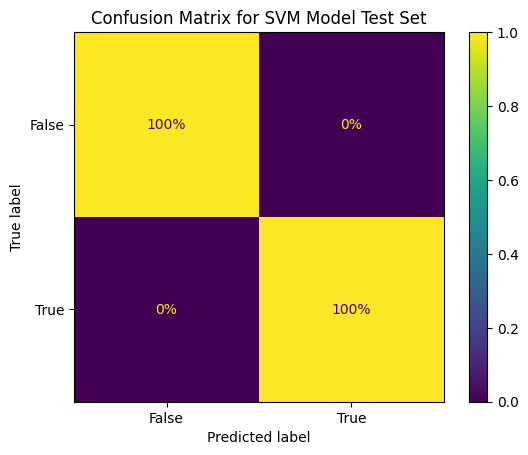

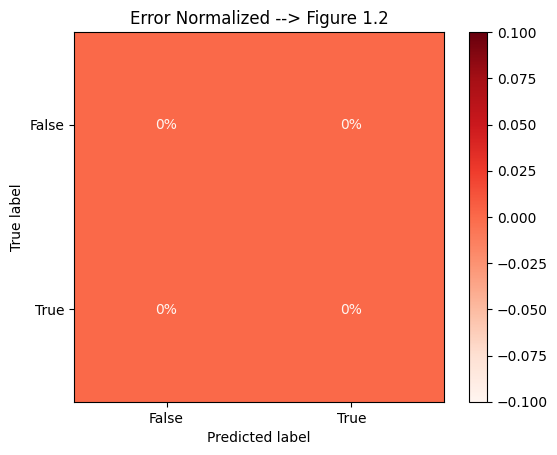

In [232]:
# predict,display and format matrix
cfm2 = ConfusionMatrixDisplay.from_predictions(y_test,y_predict_notes,normalize='true',values_format='.0%')
plt.title("Confusion Matrix for SVM Model Test Set") # set title


print("Confusion Matrix Output:\n",confusion_matrix(y_test,y_predict_notes),"\n-----------------------------------------------------------")
weights = (y_test!=y_predict_notes) # filter incorect predictions

# display matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_notes,sample_weight=weights,cmap ="Reds",normalize='true',values_format='.0%')#,normalize ='false',values_format=".0%")
plt.title("Error Normalized --> Figure 1.2")

# Result Analysis

On the top left yellow diagonal shows 100% of the instances were correctly classified as false (True negative. While 100% of the instances  were correctly classified as true (True positive). The model did not make any error as you may notice on the red color second matrix plot.

In [233]:
print("Classification report\n",classification_report(y_test,y_predict_notes),"\n") # display the result

Classification report
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       147
        True       1.00      1.00      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275
 



The result shows that is a balance between the precision and the recall. Where precision = equal to recall. The perfect classifier with an accuracy of 100%

<h1> Cross evaluation prediction from the training set</h1>

In [234]:
y_training_predict = cross_val_predict(svm_classifier,X_train,y_train,method='decision_function')
y_training_predict # display result

array([-1.19734907, -1.57750557,  0.98020988, -1.70035007, -1.548974  ,
        1.15821241, -1.18177754, -1.74932767,  1.65553951,  2.07807056,
        1.54487719, -1.92751989, -1.50121182, -1.6273806 , -1.08711813,
       -2.49952222, -1.53425579, -1.25973442,  1.3122284 , -1.43496346,
        0.7554353 , -1.66001658, -1.07932864,  1.35916213, -1.7027412 ,
       -1.75725617,  1.29069235, -2.04733162,  1.21302571, -1.29300879,
        1.57806609, -1.42730094, -1.35481776,  1.74628902,  1.52320782,
        1.23619039,  1.75527476,  1.10973744, -0.90106035, -2.28277292,
       -1.12124379,  1.09785539,  1.78576288, -2.17186127, -1.43735527,
        1.14003035,  2.228833  , -0.75078941, -1.4636972 , -0.91496119,
       -1.3870089 , -1.65130379,  1.43073611, -0.43860661, -1.44121739,
       -2.00405982, -1.57945415, -2.28501715, -2.14239315,  1.17987583,
        1.91649774,  1.07548796, -1.21333567, -1.69894586, -1.42101329,
        1.69600042, -1.42834333, -1.73453168, -1.89380222, -1.54

Text(0.5, 1.0, 'Confusion Matrix Normalize')

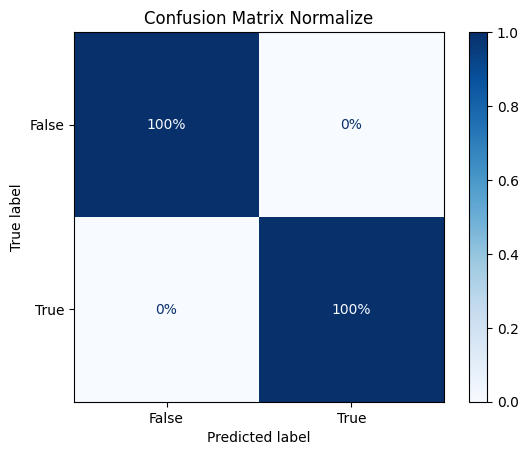

In [235]:
y_training_predict = cross_val_predict(svm_classifier,X_train,y_train,cv=3,n_jobs=-1)
ConfusionMatrixDisplay.from_predictions(y_train,y_training_predict,normalize='true',cmap='Blues',values_format='.0%')
plt.title("Confusion Matrix Normalize")

The cross evaluation matrix for the training and test set shows  all instances in the negative classified as false are truly false (True negative). While all instances for the positive class were classified as positive (True positive). No false positive and false negative. Good model

# Result Analysis

In [236]:
print("Classification Report\n",classification_report(y_train,y_training_predict),"\n") # display report

Classification Report
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       614
        True       1.00      1.00      1.00       482

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096
 



Precision is equal to recall. The harmonic mean is 1.00. on 614 instances for the negative class and 482 for the positive class respectively

<h1> Hyperparameters tuning for the Support Vector Machine</h1>

In [237]:
param_grid = {'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]} # define the grid parameter and the kernel
grid =GridSearchCV(svm.SVC(),param_grid) # select logistic model  for the grid optimizer
grid.fit(X_train,y_train) # train the classifier with the given examples

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [238]:
grid.predict(X_test)[:9] # Make predictions with grid optimizer

array([False, False, False, False,  True,  True,  True,  True,  True])

In [239]:
print("Grid Best Score:",grid.best_params_) # display grid best score
print("Grid Accuracy%:",grid.score(X_test,y_test)) # display grid accuracy

Grid Best Score: {'C': 1, 'degree': 1, 'kernel': 'rbf'}
Grid Accuracy%: 1.0


We have defined various step size, degree and various kernel for the grid optimizer. This purpose for the configuration is to efficiently optimize our model. For this task, we have used the grid  to optimize the support vector machine model and 100% accuracy was achieved as compare to the logistic regression which achieve 99%.

<h1> Summary</h1>

<justify>For this project we have used two classifiers for our task. We were able achieve a 100% accuracy with the support vector machine classifier and 99% with the logistic regression classifier after hyper tuning the Logistic regression model with grip optimizer. For the support vector machine, the accuracy was 100% initially, and after hyper tuning with grid optimizer we were able to achieve similar accuracy. These classifiers has been evaluated on both on the training set and the test set. The models seems to work efficiently in differentiating genuine bank notes from forged bank notes. It is presume to work well for unseen new cases. <br> 
<p> This classifier will help mitigate fraud that may occur in the bank using a forged bank notes. Although, for this project we were targeting a high recall due to the sensitive nature of the bank note. Notwithstanding, since  we have 44% of the forged bank note that is the minority class over majority class which takes a larger portion of 56%. Our classifiers were able to set a reasonable harmonic mean between the both classes, which is a good tradeoff to path with. So we accept the result.</justify>

In [240]:
data = data.to_csv("cleaned_dataset.csv") # save to csv